In [1]:
from panda.methods import viz as viz
from panda import default_config
import numpy as np
import os 
#pipeline methods 
from panda.methods.misc import setup
from panda.methods.denoise import highpass 
from panda.methods.denoise import bandstop 
from panda.methods.denoise import wave_rejection
from panda.methods.denoise import eog_regress 
from panda.methods.denoise import amp_shrinkage 
from panda.methods.bad_chans import bad_detec
from panda.methods.interpolation import wave_interp

from numpy import genfromtxt
import cPickle as pkl 

In [2]:
mtx = pkl.load(open('/home/student/Documents/chan_locs.pkl', 'rb'))
np.shape(mtx)

(111, 3)

In [3]:
eeg_datapath = '/home/student/Documents/sub-NDARAA075AMK_eeg.pkl'

eeg_outpath = '/home/student/Documents/pkl_files/sub-NDARAA075AMK_correlation.np'

with open(eeg_datapath, 'rb') as f:
    data = pkl.load(f)
with open('/home/student/Documents/chan_locs.pkl') as f:
    chan_locs = pkl.load(f)
    
p_global = default_config.params['p_global']
p_global['plot_folders']['heatmap_dir'] = ''
p_global['plot_folders']['sparkline_dir'] = ''
eog_chans = []
eeg_chans = np.setdiff1d(np.arange(111), eog_chans)
p_global.update({'eog_chans': eog_chans, 
                'eeg_chans': eeg_chans})
p_global['inter'].update({'chan_locs': chan_locs})
p_global['plotting']['notebook'] = True

In [4]:
(data, p_local) = setup(data, {'eog_in': True}, p_global)

In [5]:
(data, p_local) = highpass(data, p_local, p_global)
(data, p_local) = eog_regress(data, p_local, p_global)
(data, p_local) = wave_rejection(data, p_local, p_global)
(data, p_local) = amp_shrinkage(data, p_local, p_global)

In [6]:
(D_bd, p_local) = bad_detec(data, p_local, p_global)
D_bd[p_local['bad_chans'], :] = 0

Test
[ 0  7 13 19 23]
Here
Here


In [7]:
(D_int, p_local) = wave_interp(D_bd, p_local, p_global)
np.save(eeg_outpath, D_int)

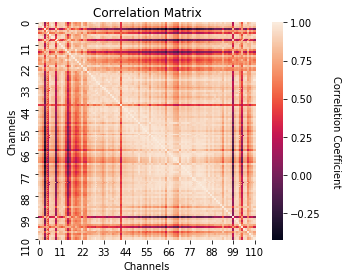

In [8]:
viz.correlation(D_int, p_local, p_global)

In [10]:
array1 = np.load('/home/student/Documents/pkl_files/sub-NDARAA075AMK_correlation.np.npy')

In [11]:
np.shape(array1)

(111, 182086)

In [8]:
if p_local['eog_in']: 
    D_int = D_int[p_global['eeg_chans'], :]
    
with np.errstate(invalid='ignore'):
    D_int = np.nan_to_num(np.corrcoef(D_int))

In [9]:
np.shape(D_int)

(111, 111)

In [12]:
D_int

array([[1.        , 0.95803527, 0.8819725 , ..., 0.87159288, 0.94648527,
        0.94647662],
       [0.95803527, 1.        , 0.90214279, ..., 0.89903354, 0.93553213,
        0.89554328],
       [0.8819725 , 0.90214279, 1.        , ..., 0.79894443, 0.8743514 ,
        0.79370335],
       ...,
       [0.87159288, 0.89903354, 0.79894443, ..., 1.        , 0.8985885 ,
        0.80199907],
       [0.94648527, 0.93553213, 0.8743514 , ..., 0.8985885 , 1.        ,
        0.91643165],
       [0.94647662, 0.89554328, 0.79370335, ..., 0.80199907, 0.91643165,
        1.        ]])

In [16]:
from matplotlib import pyplot as plt
import matplotlib.colors as colors

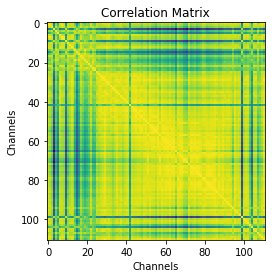

In [20]:
plt.xlabel("Channels");
plt.ylabel("Channels");
plt.title("Correlation Matrix");
plt.imshow(D_int)